In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [24]:
df = pd.read_csv('Hackaton - 2025/Год - 2024 (весь год)/drug_2024.csv')
dfl = pd.read_csv('Hackaton - 2025/Год - 2024 (весь год)/lab_2024.csv')
dfe = pd.read_csv('Hackaton - 2025/Год - 2024 (весь год)/event_2024_anonim.csv')

df = df[df.status==2]
df.execution_date = pd.to_datetime(df.execution_date)

dfl = dfl[dfl.status == 2]

dfe = dfe[dfe['request_type']!='Поликлиника']
dfe.hosp_start = pd.to_datetime(dfe.hosp_start)
dfe.hosp_end = pd.to_datetime(dfe.hosp_end)

df_merged = df.merge(dfe, on='event_id')
df_merged.pop('client_id_y')
df_merged.rename(columns={'client_id_x': 'client_id'}, inplace=True)

In [25]:
df

,id,event_id,client_id,mnn,concentration,dose,measure,execution_date,method,status,status_name
12,1214294,20662525,444087,Циклофосфамид,NaN,1000,мг,2024-01-03 10:41:19+00:00,Внутривенный,2,выполнено
13,1214295,20662525,444087,Натрия хлорид,0.9%,250,мл,2024-01-03 10:41:19+00:00,Внутривенный,2,выполнено
14,1214296,20662525,444087,Этопозид,NaN,160,мг,2024-01-03 10:45:08+00:00,Внутривенный,2,выполнено
15,1214297,20662525,444087,Натрия хлорид,0.9%,250,мл,2024-01-03 10:45:08+00:00,Внутривенный,2,выполнено
16,1214332,20662525,444087,Этопозид,NaN,300,мг,2024-01-03 10:49:05+00:00,Для приема внутрь,2,выполнено
...,...,...,...,...,...,...,...,...,...,...,...
1741864,3736572,20751786,502326,Фуросемид,NaN,200,мг,2025-01-28 16:52:31+00:00,Внутривенный длительная,2,выполнено
1741865,3736573,20751786,502326,Фуросемид,NaN,200,мг,2025-01-29 13:09:05+00:00,Внутривенный длительная,2,выполнено
1741979,3739874,20751786,502326,Магния сульфат,NaN,10,мл,2025-01-29 19:25:01+00:00,Внутривенный длительная,2,выполнено
1742010,3739905,20751786,502326,Натрия хлорид,0.9%,250,мл,2025-01-29 19:25:00+00:00,Внутривенный длительная,2,выполнено


In [26]:
df_merged

,id,event_id,client_id,mnn,concentration,dose,measure,execution_date,method,status,status_name,hosp_start,hosp_end,request_type,event_org_code,icd_codes_anon
0,1214294,20662525,444087,Циклофосфамид,NaN,1000,мг,2024-01-03 10:41:19+00:00,Внутривенный,2,выполнено,2024-01-02 08:00:01+00:00,2024-01-12 14:00:59+00:00,Дневной стационар,02.26,"N96, C59"
1,1214295,20662525,444087,Натрия хлорид,0.9%,250,мл,2024-01-03 10:41:19+00:00,Внутривенный,2,выполнено,2024-01-02 08:00:01+00:00,2024-01-12 14:00:59+00:00,Дневной стационар,02.26,"N96, C59"
2,1214296,20662525,444087,Этопозид,NaN,160,мг,2024-01-03 10:45:08+00:00,Внутривенный,2,выполнено,2024-01-02 08:00:01+00:00,2024-01-12 14:00:59+00:00,Дневной стационар,02.26,"N96, C59"
3,1214297,20662525,444087,Натрия хлорид,0.9%,250,мл,2024-01-03 10:45:08+00:00,Внутривенный,2,выполнено,2024-01-02 08:00:01+00:00,2024-01-12 14:00:59+00:00,Дневной стационар,02.26,"N96, C59"
4,1214332,20662525,444087,Этопозид,NaN,300,мг,2024-01-03 10:49:05+00:00,Для приема внутрь,2,выполнено,2024-01-02 08:00:01+00:00,2024-01-12 14:00:59+00:00,Дневной стационар,02.26,"N96, C59"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076574,3736572,20751786,502326,Фуросемид,NaN,200,мг,2025-01-28 16:52:31+00:00,Внутривенный длительная,2,выполнено,2024-12-27 10:56:15+00:00,2025-01-30 14:00:59+00:00,Круглосуточный стационар,02.31,"S55, K33, B06, R14, K01, F42, M82, Z50, S38, G..."
1076575,3736573,20751786,502326,Фуросемид,NaN,200,мг,2025-01-29 13:09:05+00:00,Внутривенный длительная,2,выполнено,2024-12-27 10:56:15+00:00,2025-01-30 14:00:59+00:00,Круглосуточный стационар,02.31,"S55, K33, B06, R14, K01, F42, M82, Z50, S38, G..."
1076576,3739874,20751786,502326,Магния сульфат,NaN,10,мл,2025-01-29 19:25:01+00:00,Внутривенный длительная,2,выполнено,2024-12-27 10:56:15+00:00,2025-01-30 14:00:59+00:00,Круглосуточный стационар,02.31,"S55, K33, B06, R14, K01, F42, M82, Z50, S38, G..."
1076577,3739905,20751786,502326,Натрия хлорид,0.9%,250,мл,2025-01-29 19:25:00+00:00,Внутривенный длительная,2,выполнено,2024-12-27 10:56:15+00:00,2025-01-30 14:00:59+00:00,Круглосуточный стационар,02.31,"S55, K33, B06, R14, K01, F42, M82, Z50, S38, G..."


In [191]:
df_merged = df_merged[df_merged.execution_date > df_merged.hosp_start]
df_merged = df_merged[df_merged.execution_date < df_merged.hosp_end]

In [192]:
df_merged_first = df_merged.sort_values('execution_date').drop_duplicates('event_id', keep='first')
df_merged_last = df_merged.sort_values('execution_date').drop_duplicates('event_id', keep='last')

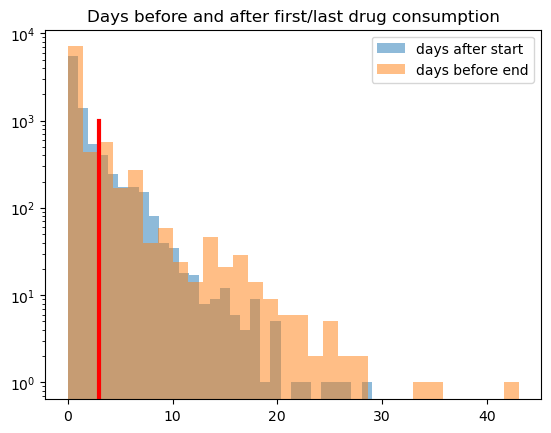

In [193]:
df_merged_first['delta_start'] = (df_merged_first['execution_date'] - df_merged_first['hosp_start']).apply(lambda x: x.days)
df_merged_last['delta_end'] = (df_merged_last['hosp_end'] - df_merged_last['execution_date']).apply(lambda x: x.days)
plt.hist(df_merged_first['delta_start'], bins=30, label='days after start', alpha=0.5)
plt.hist(df_merged_last['delta_end'], bins=30, label='days before end', alpha=0.5)
plt.yscale('log')
plt.plot([3,3], [0, 10**3], color='r', linewidth=3)
plt.title('Days before and after first/last drug consumption')
plt.legend()

In [194]:
dfs3 = df_merged_first[df_merged_first['delta_start'] > 3] 
unef_s = dfs3.delta_start.sum() - 3 * len(dfs3)
print('Unefficient start days:', unef_s)

Unefficient start days: 3743


In [195]:
dfe3 = df_merged_last[df_merged_last['delta_end'] > 3] 
unef_e = dfe3.delta_end.sum() - 3 * len(dfe3)
print('Unefficient end days:', unef_e)

Unefficient end days: 4447


In [196]:
all_hosp_days = (df_merged_first['hosp_end'] - df_merged_first['hosp_start']).apply(lambda x: x.days).sum()
print('Unefficient rate days:', (unef_s + unef_e) / all_hosp_days)

Unefficient rate days: 0.06390648896657199


Median:  13.0 . Mean:  14.548302872062663


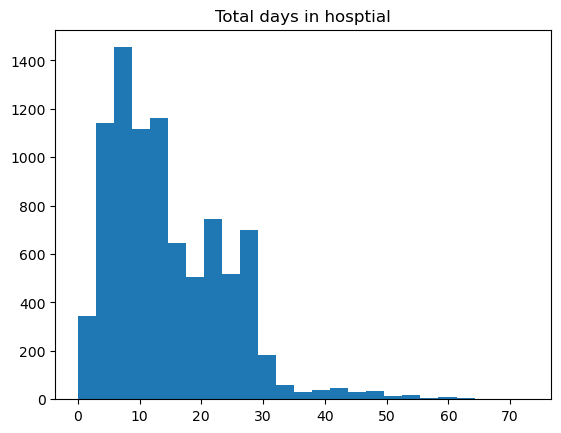

In [197]:
plt.title('Total days in hosptial')
tdays = (df_merged_first['hosp_end'] - df_merged_first['hosp_start']).apply(lambda x: x.days)
plt.hist(tdays, bins=25)
print('Median: ', np.median(tdays), '. Mean: ', np.mean(tdays))
# plt.yscale('log')

In [198]:
print('The total unefiicient ', unef_s + unef_e, ' days')
print("It's about ", np.round((unef_s + unef_e) / np.median(tdays)), ' patients')
print("Now total yearly patient number is ", df_merged_first.client_id.nunique())
print("The hospital could heal +", ((unef_s + unef_e) / np.median(tdays)) / df_merged_first.client_id.nunique(), "%")

The total unefiicient  8190  days
It's about  630.0  patients
Now total yearly patient number is  3045
The hospital could heal + 0.20689655172413793 %


Unefficient start days: 3017
Unefficient end days: 1624
Unefficient rate days: 0.04855516729091251


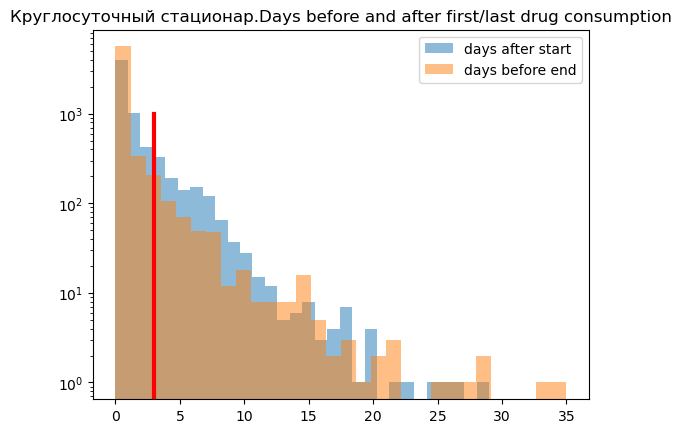

In [199]:
rtype = 'Круглосуточный стационар'
df_merged_first = df_merged[df_merged.request_type==rtype].sort_values('execution_date').drop_duplicates('event_id', keep='first')
df_merged_last = df_merged[df_merged.request_type==rtype].sort_values('execution_date').drop_duplicates('event_id', keep='last')
df_merged_first['delta_start'] = (df_merged_first['execution_date'] - df_merged_first['hosp_start']).apply(lambda x: x.days)
df_merged_last['delta_end'] = (df_merged_last['hosp_end'] - df_merged_last['execution_date']).apply(lambda x: x.days)
plt.hist(df_merged_first['delta_start'], bins=30, label='days after start', alpha=0.5)
plt.hist(df_merged_last['delta_end'], bins=30, label='days before end', alpha=0.5)
# plt.xlim(-1, 45)
plt.yscale('log')
plt.plot([3,3], [0, 10**3], color='r', linewidth=3)
plt.title(rtype+'.Days before and after first/last drug consumption')
plt.legend()
dfs3 = df_merged_first[df_merged_first['delta_start'] > 3] 
unef_s = dfs3.delta_start.sum() - 3 * len(dfs3)
print('Unefficient start days:', unef_s)
dfe3 = df_merged_last[df_merged_last['delta_end'] > 3] 
unef_e = dfe3.delta_end.sum() - 3 * len(dfe3)
print('Unefficient end days:', unef_e)
df_merged_first['hosp_dur'] = (df_merged_first['hosp_end'] - df_merged_first['hosp_start']).apply(lambda x: x.days)
all_hosp_days = df_merged_first[df_merged_first['hosp_dur'] > 0].hosp_dur.sum()
print('Unefficient rate days:', (unef_s + unef_e) / all_hosp_days)

Median:  12.0 . Mean:  14.59267175572519


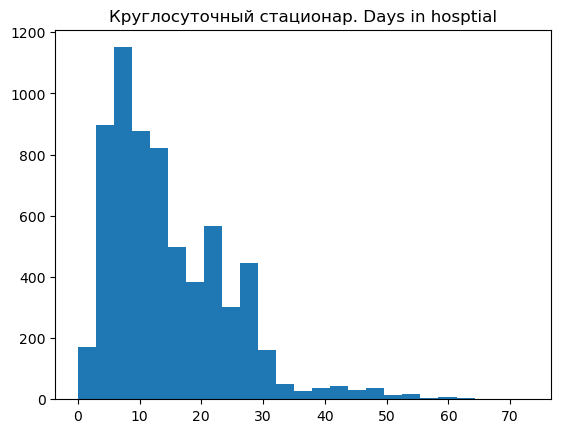

In [200]:
plt.title(rtype+'. Days in hosptial')
tdays = (df_merged_first['hosp_end'] - df_merged_first['hosp_start']).apply(lambda x: x.days)
plt.hist(tdays, bins=25)
print('Median: ', np.median(tdays), '. Mean: ', np.mean(tdays))

In [201]:
print('The total unefiicient ', unef_s + unef_e, ' days')
print("It's about ", np.round((unef_s + unef_e) / np.median(tdays)), ' patients')
print("Now total yearly patient number is ", df_merged_first.client_id.nunique())
print("The hospital could heal +", ((unef_s + unef_e) / np.median(tdays)) / df_merged_first.client_id.nunique(), "%")

The total unefiicient  4641  days
It's about  387.0  patients
Now total yearly patient number is  2594
The hospital could heal + 0.1490940632228219 %


Unefficient start days: 726
Unefficient end days: 2823
Unefficient rate days: 0.10895192484803831


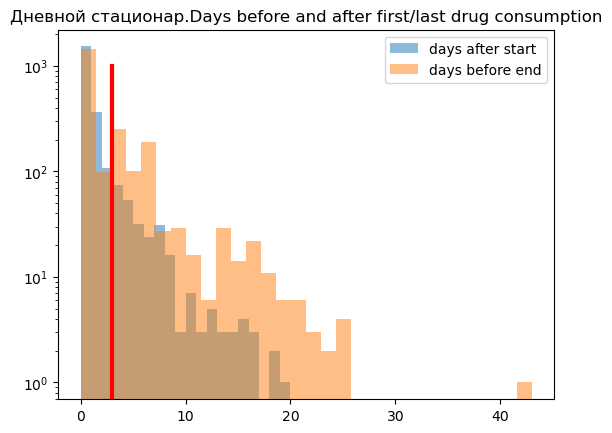

In [202]:
rtype = 'Дневной стационар'
df_merged_first = df_merged[df_merged.request_type==rtype].sort_values('execution_date').drop_duplicates('event_id', keep='first')
df_merged_last = df_merged[df_merged.request_type==rtype].sort_values('execution_date').drop_duplicates('event_id', keep='last')
df_merged_first['delta_start'] = (df_merged_first['execution_date'] - df_merged_first['hosp_start']).apply(lambda x: x.days)
df_merged_last['delta_end'] = (df_merged_last['hosp_end'] - df_merged_last['execution_date']).apply(lambda x: x.days)
plt.hist(df_merged_first['delta_start'], bins=20, label='days after start', alpha=0.5)
plt.hist(df_merged_last['delta_end'], bins=30, label='days before end', alpha=0.5)
# plt.xlim(-1, 45)
plt.yscale('log')
plt.plot([3,3], [0, 10**3], color='r', linewidth=3)
plt.title(rtype+'.Days before and after first/last drug consumption')
plt.legend()
dfs3 = df_merged_first[df_merged_first['delta_start'] > 3] 
unef_s = dfs3.delta_start.sum() - 3 * len(dfs3)
print('Unefficient start days:', unef_s)
dfe3 = df_merged_last[df_merged_last['delta_end'] > 3] 
unef_e = dfe3.delta_end.sum() - 3 * len(dfe3)
print('Unefficient end days:', unef_e)
df_merged_first['hosp_dur'] = (df_merged_first['hosp_end'] - df_merged_first['hosp_start']).apply(lambda x: x.days)
all_hosp_days = df_merged_first[df_merged_first['hosp_dur'] > 0].hosp_dur.sum()
print('Unefficient rate days:', (unef_s + unef_e) / all_hosp_days)

Median:  13.0 . Mean:  14.419654714475431


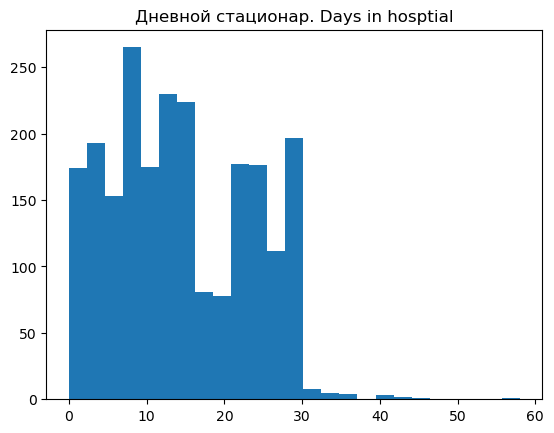

In [203]:
plt.title(rtype+'. Days in hosptial')
tdays = (df_merged_first['hosp_end'] - df_merged_first['hosp_start']).apply(lambda x: x.days)
plt.hist(tdays, bins=25)
print('Median: ', np.median(tdays), '. Mean: ', np.mean(tdays))

In [204]:
print('The total unefiicient ', unef_s + unef_e, ' days')
print("It's about ", np.round((unef_s + unef_e) / np.median(tdays)), ' patients')
print("Now total yearly patient number is ", df_merged_first.client_id.nunique())
print("The hospital could heal +", ((unef_s + unef_e) / np.median(tdays)) / df_merged_first.client_id.nunique(), "%")

The total unefiicient  3549  days
It's about  273.0  patients
Now total yearly patient number is  710
The hospital could heal + 0.3845070422535211 %


# optimize lab

In [10]:
dfl

,id,event_id,client_id,action_start,action_end,status,status_name,actiontype_id
0,26126530,20662567,413377,2024-01-01T11:37:10Z,NaN,2,закончено,4406
1,26126531,20662567,413377,2024-01-01T11:37:11Z,NaN,2,закончено,4406
2,26126532,20662567,413377,2024-01-01T11:37:12Z,2024-01-05T14:45:10Z,2,закончено,4461
3,26128345,20662567,413377,2024-01-03T06:35:12Z,2024-01-05T14:45:36Z,2,закончено,7132
4,26128346,20662567,413377,2024-01-03T06:35:13Z,2024-01-05T14:45:25Z,2,закончено,4475
...,...,...,...,...,...,...,...,...
473486,27740071,20751909,495972,2024-12-31T09:00:00Z,2024-12-31T10:43:31Z,2,закончено,4421
473488,27734826,20751910,505827,2024-12-31T09:00:00Z,2024-12-31T11:10:29Z,2,закончено,4418
473489,27734827,20751910,505827,2024-12-31T09:00:00Z,2024-12-31T09:55:29Z,2,закончено,4406
473491,27739992,20751910,505827,2024-12-31T09:00:00Z,2024-12-31T10:44:05Z,2,закончено,4421


In [221]:
sum(dfl.action_end.apply(type) == float) / len(dfl.action_end)
dfle = dfl[dfl.action_end == dfl.action_end]
dfle.action_start = pd.to_datetime(dfle.action_start)
dfle.action_end = pd.to_datetime(dfle.action_end)
dfle['delta'] = (dfle.action_end - dfle.action_start).apply(lambda x: x.days)

# sum(dfl.action_end.apply(type)# / len(dfl.action_end)
# sum(dfl.action_end.apply(type)# / len(dfl.action_end)

C:\Users\USER\AppData\Local\Temp\ipykernel_21644\1696025947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle.action_start = pd.to_datetime(dfle.action_start)
C:\Users\USER\AppData\Local\Temp\ipykernel_21644\1696025947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle.action_end = pd.to_datetime(dfle.action_end)
C:\Users\USER\AppData\Local\Temp\ipykernel_21644\1696025947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [228]:
dfle.groupby('actiontype_id').delta.mean().sort_values()[::-1]

actiontype_id
12495    88.000000
8443     84.000000
12328    61.000000
7714     59.333333
12659    50.500000
           ...    
12434     0.000000
6077      0.000000
6078      0.000000
6079      0.000000
8624      0.000000
Name: delta, Length: 549, dtype: float64

In [235]:
sum(dfle.groupby('actiontype_id').delta.quantile(0.25).sort_values()[::-1] < 3) / dfle.actiontype_id.nunique()

0.3989071038251366

In [240]:
q25 = dict(dfle.groupby('actiontype_id').delta.quantile(0.25))

In [252]:
dfle['q25'] = dfle.actiontype_id.apply(lambda x: q25.get(x))
dfle['is_more'] = (dfle['delta'] - dfle['q25']) > 0
dfle['extra_days'] = (dfle['delta'] - dfle['q25']) * dfle['is_more']

C:\Users\USER\AppData\Local\Temp\ipykernel_21644\2209606981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle['q25'] = dfle.actiontype_id.apply(lambda x: q25.get(x))
C:\Users\USER\AppData\Local\Temp\ipykernel_21644\2209606981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfle['is_more'] = (dfle['delta'] - dfle['q25']) > 0
C:\Users\USER\AppData\Local\Temp\ipykernel_21644\2209606981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [254]:
# sum((dfle['delta'] - dfle['q25']) > 0)
dfle['extra_days'].sum()

413423.75

In [246]:
sum((dfle['delta'] - dfle['q25'])[(dfle['delta'] - dfle['q25']) > 0])

413423.75